In [28]:
import numpy as np
import matplotlib.pyplot as plt
import plot_contour as pc
import os
import pynbody
import kinetic_measure as km

In [29]:
savedir = '/home/seoyoung/analysis/long_slit/'

#slit_data = np.loadtxt(savedir+'long_slit_z_'+str(round(np.abs(s.properties['z']),3))+'.txt', dtype = [('ang_x',float),('ang_y',float),('ang_z',float),('r_1',float),('r_2',float),('r_3',float),('r_4',float),('r_5',float),('r_6',float),('r_7',float),('r_8',float),('r_9',float),('r_10',float),('r_11',float),('r_12',float),('r_13',float),('r_14',float),('r_15',float),('v_1',float),('v_2',float),('v_3',float),('v_4',float),('v_5',float),('v_6',float),('v_7',float),('v_8',float),('v_9',float),('v_10',float),('v_11',float),('v_12',float),('v_13',float),('v_14',float),('v_15',float),('sig_1',float),('sig_2',float),('sig_3',float),('sig_4',float),('sig_5',float),('sig_6',float),('sig_7',float),('sig_8',float),('sig_9',float),('sig_10',float),('sig_11',float),('sig_12',float),('sig_13',float),('sig_14',float),('sig_15',float),('v_max',float),('sig_center',float),('eta',float),('Mk',float),('ellip',float)])

slit_data = np.loadtxt(savedir+'long_slit_z_0.0_majax.txt')
slit_data_04 = np.loadtxt(savedir+'long_slit_z_0.4_majax.txt')

slit_data_spin = np.loadtxt(savedir+'long_slit_z_0.0.txt')
slit_data_04_spin = np.loadtxt(savedir+'long_slit_z_0.4.txt')

rot_angles = slit_data[:,:3]
r_list = slit_data[:,3:18]
v_list = slit_data[:,18:33]
sig_list = slit_data[:,33:48]
v_max = slit_data[:,48]
sig_0 = slit_data[:,49]
eta = slit_data[:,50]
ellip = slit_data[:,51]

rot_angles_spin = slit_data_spin[:,:3]
r_list_spin = slit_data_spin[:,3:18]
v_list_spin = slit_data_spin[:,18:33]
sig_list_spin = slit_data_spin[:,33:48]
v_max_spin = slit_data_spin[:,48]
sig_0_spin = slit_data_spin[:,49]
eta_spin = slit_data_spin[:,50]
ellip_spin = slit_data_spin[:,51]


rot_angles_04 = slit_data_04[:,:3]
r_list_04 = slit_data_04[:,3:18]
v_list_04 = slit_data_04[:,18:33]
sig_list_04 = slit_data_04[:,33:48]
v_max_04 = slit_data_04[:,48]
sig_0_04 = slit_data_04[:,49]
eta_04 = slit_data_04[:,50]
ellip_04 = slit_data_04[:,51]

rot_angles_04_spin = slit_data_04_spin[:,:3]
r_list_04_spin = slit_data_04_spin[:,3:18]
v_list_04_spin = slit_data_04_spin[:,18:33]
sig_list_04_spin = slit_data_04_spin[:,33:48]
v_max_04_spin = slit_data_04_spin[:,48]
sig_0_04_spin = slit_data_04_spin[:,49]
eta_04_spin = slit_data_04_spin[:,50]
ellip_04_spin = slit_data_04_spin[:,51]

In [34]:
savedir = '/home/seoyoung/analysis/figure/'

simdir = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/'
param_file = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.param'

filelist = os.listdir(simdir)

In [35]:
result = [i[-6:] for i in filelist if i.startswith('h1.cosmo50') and len(i)==35]
result.sort()

In [36]:
snap = result[-27] #redshift 0.4
data_file = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.'+snap
s = pynbody.load(data_file, paramfile = param_file)
s.physical_units()

h = s.halos()
h0 = h[0]
pynbody.analysis.halo.center(h0,mode='hyb')


In [37]:
ang

NameError: name 'ang' is not defined

In [ ]:
for i in range(0,np.where(eta_04>0)[0][0]+1):
    print(i)
    ang = rot_angles_04[i]
    s.rotate_x(ang[0])
    s.rotate_y(ang[1])
    s.rotate_z(ang[2])
    


In [ ]:
s_filt = s[pynbody.filt.Disc('11 kpc h^-1', '35 kpc h^-1')]

v_slit, sig_slit, r_slit, sig_0, ellip = km.get_slit(s,15,15, align = 'phot') 
v_spax, sig_spax = km.get_IFS(s_filt.star,half_size = 15, nbin = 30, add_info = "", save = False,re_cal = True)


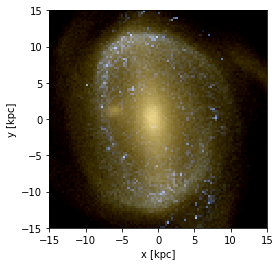

In [23]:
rgb = pynbody.plot.stars.render(s, width = '30 kpc', resolution = 100, dynamic_range = 2,plot = True,ret_im = True)


/home/seoyoung/anaconda3/lib/python3.7/site-packages/pynbody/plot/stars.py:74: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(image*pc2_to_sqarcsec)


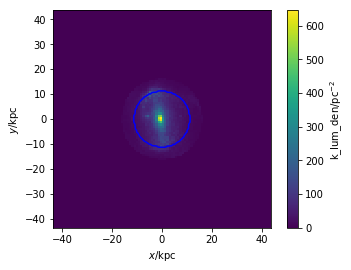

In [16]:
a,b,phi, center, ellip = km.isophote_fit(s_filt.star)

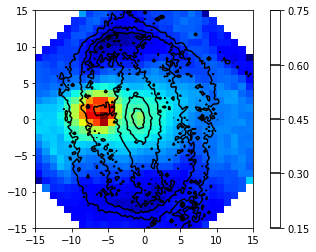

In [24]:
plt.imshow(sig_spax.T[::-1], origin = 'upper', cmap = 'jet', extent = [-15,15,-15,15])
plt.contour(rgb[:,:,1], colors = 'k', extent = [-15,15,-15,15])

plt.colorbar()

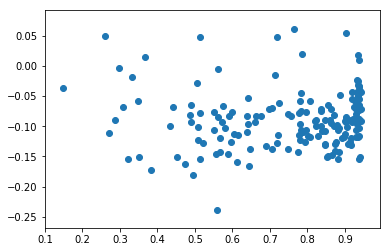

In [17]:
plt.scatter(ellip_04,eta_04)

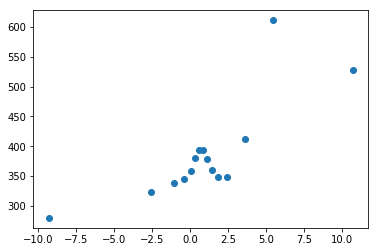

In [33]:
plt.scatter(r_list_04[np.where(eta_04>0)[0][0]],sig_list_04[np.where(eta_04>0)[0][0]])


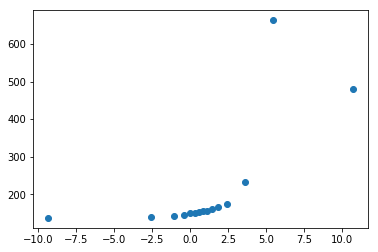

In [13]:
plt.scatter(r_slit,v_slit)

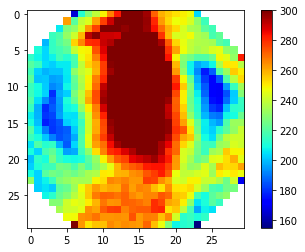

In [12]:
plt.imshow(sig_spax, cmap = 'jet')
plt.colorbar()

In [3]:
print(len(slit_data), len(slit_data_04))

168 168


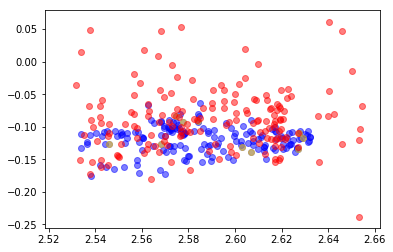

In [5]:
plt.scatter(np.log10(sig_0), eta, color = 'b', alpha = 0.5)
plt.scatter(np.log10(sig_0[:10]), eta[:10], color = 'gold', alpha = 0.5)
plt.scatter(np.log10(sig_0_04), eta_04, color = 'r', alpha = 0.5)


/home/seoyoung/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)


(-0.25, 0.1)

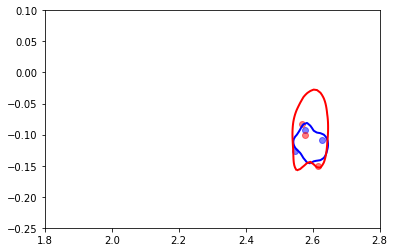

In [17]:
pc.plot(np.log10(sig_0), eta,nbins = 100, color = 'b', ranges = [[1.8,2.8],[-0.25,0.1]], sig05 = False, sig1 = True, sig2 = False)
plt.scatter(np.log10(sig_0[:3]), eta[:3], color = 'b', alpha = 0.5)

pc.plot(np.log10(sig_0_04), eta_04,nbins = 100, color = 'r', ranges = [[1.8,2.8],[-0.25,0.1]], sig05 = False, sig1 = True, sig2 = False)
plt.scatter(np.log10(sig_0_04[:3]), eta_04[:3], color = 'r', alpha = 0.5)

plt.gca().patch.set_alpha(0)

plt.xlim(1.8,2.8)
plt.ylim(-0.25,0.1)

Text(0,0.5,'$\\eta$')

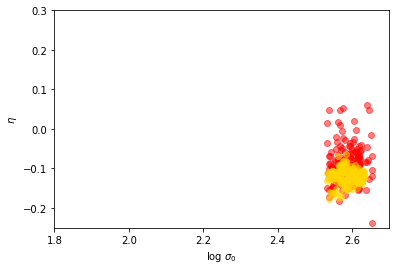

In [22]:
plt.scatter(np.log10(sig_0_04), eta_04, color = 'r', alpha = 0.5)
plt.scatter(np.log10(sig_0), eta, color = 'gold', alpha = 0.5)

plt.xlim(1.8,2.7)
plt.ylim(-0.25,0.3)
plt.gca().patch.set_alpha(0)

plt.xlabel("log $\sigma_{0}$")
plt.ylabel("$\eta$")

In [33]:
import os
import pynbody
savedir = '/home/seoyoung/analysis/long_slit/'

simdir = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/'
param_file = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.param'

filelist = os.listdir(simdir)

In [34]:
result = [i[-6:] for i in filelist if i.startswith('h1.cosmo50') and len(i)==35]
result.sort()

In [35]:
filt_size = 35
n_dir = 10
nbins = 15
snap = result[::-1][0]
#snap = result[-27] #redshift 0.4


data_file = '/project/rrg-babul-ad/rennehan/romulus_data/h1.cosmo50/h1.cosmo50PLK.1536gst1bwK1BH.'+snap
s = pynbody.load(data_file, paramfile = param_file)
s.physical_units()

print("get halos")
h = s.halos()
h0 = h[0]
pynbody.analysis.halo.center(h0,mode='hyb')



get halos


In [36]:
s_filt = s[pynbody.filt.Sphere(str(filt_size)+' kpc h^-1')]

In [37]:
for i in range(0,np.where(eta_04>0)[0][0]+1):

s_filt = part[pynbody.filt.Disc('11 kpc h^-1', '35 kpc h^-1')]

NameError: name 'part' is not defined

In [26]:
np.where(eta_04>0)[0][0]

v_spax, sig_spax = get_IFS(s_filt.star,half_size = filt_size/s_filt.properties['h'], nbin = nbin, add_info = "_random"+str(i)+"_z_"+zred, re_cal = re_cal)


array([  7,  10,  63,  65, 117, 124, 128, 149, 157])

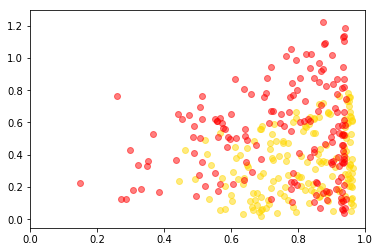

In [32]:

plt.scatter(ellip, v_max/sig_0, color = 'gold', alpha = 0.5)
#pc.plot(ellip, v_max/sig_0,nbins = 100, color = 'gold', ranges = [[0,1],[0,1.5]], sig05 = False, sig1 = True, sig2 = False)

plt.scatter(ellip_04, v_max_04/sig_0_04, color = 'r', alpha = 0.5)
#pc.plot(ellip_04, v_max_04/sig_0_04,nbins = 100, color = 'r', ranges = [[0,1],[0,1.5]], sig05 = False, sig1 = True, sig2 = False)



plt.xlim(0,1)
plt.gca().patch.set_alpha(0)


Text(0,0.5,'#')

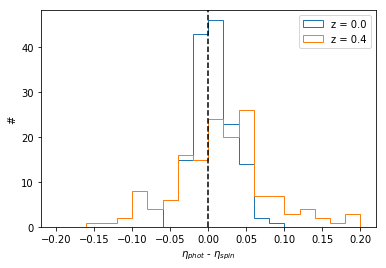

In [19]:
plt.hist(eta[:150]-eta_spin[:150], histtype = 'step', range = [-0.2,0.2], bins = 20, label = 'z = 0.0')
plt.hist(eta_04[:150]-eta_04_spin[:150], histtype = 'step', range = [-0.2,0.2], bins = 20, label = 'z = 0.4')

plt.axvline(0, linestyle = '--', color = 'k')
plt.legend()
plt.xlabel("$\eta_{phot}$ - $\eta_{spin}$")
plt.ylabel("#")

In [26]:
sig_0_04[:10]-sig_0_04_spin[:10]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.68434189e-14, 5.68434189e-14, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

Text(0,0.5,'#')

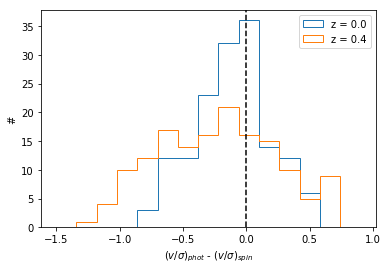

In [27]:
plt.hist((v_max/sig_0)[:150]-(v_max_spin/sig_0_spin)[:150], histtype = 'step', range = [-1.5,0.9], bins = 15, label = 'z = 0.0')
plt.hist((v_max_04/sig_0_04)[:150]-(v_max_04_spin/sig_0_04_spin)[:150], histtype = 'step', range = [-1.5,0.9],bins = 15, label = 'z = 0.4')

plt.axvline(0, linestyle = '--', color = 'k')
plt.legend()
plt.xlabel("$(v/\sigma)_{phot}$ - $(v/\sigma)_{spin}$")
plt.ylabel("#")

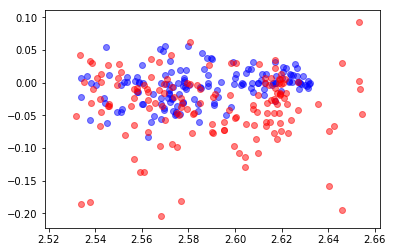

In [8]:
plt.scatter(np.log10(sig_0[:150]), eta_spin[:150]-eta[:150], color = 'b', alpha = 0.5)
plt.scatter(np.log10(sig_0_04[:150]), eta_04_spin[:150]-eta_04[:150], color = 'r', alpha = 0.5)


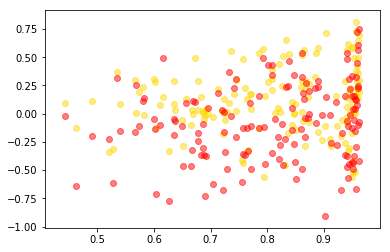

In [6]:
plt.scatter(ellip[:150], (v_max_spin[:150]/sig_0_spin[:150])-(v_max[:150]/sig_0[:150]), color = 'gold', alpha = 0.5)
plt.scatter(ellip[:150], (v_max_04_spin[:150]/sig_0_04_spin[:150])-(v_max_04[:150]/sig_0_04[:150]), color = 'r', alpha = 0.5)

#plt.scatter(ellip_04, v_max_04/sig_0_04, color = 'r', alpha = 0.5)

#plt.xlim(0,1)
plt.gca().patch.set_alpha(0)


Text(0,0.5,'#')

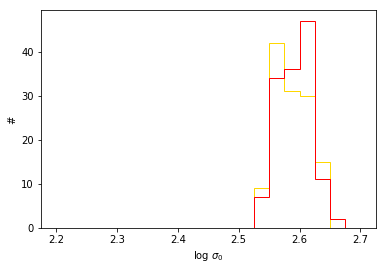

In [48]:
plt.hist(np.log10(sig_0), range = [2.2,2.7], bins = 20, edgecolor = 'gold', histtype = 'step')
plt.hist(np.log10(sig_0_04), range = [2.2,2.7], bins = 20, edgecolor = 'r', histtype = 'step')
plt.xlabel("log $\sigma_{0}$")
plt.ylabel("#")

Text(0,0.5,'$\\sigma$')

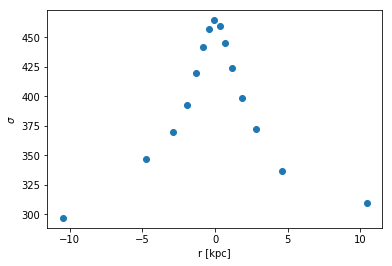

In [16]:
plt.scatter(r_list[10],sig_list[10])
plt.xlabel("r [kpc]")
plt.ylabel("$\sigma$")

Text(0,0.5,'$v_{rpt}$')

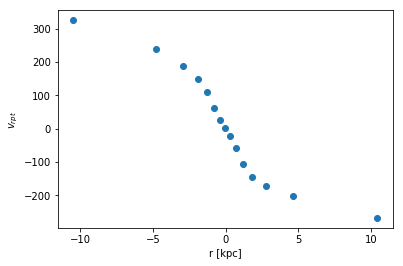

In [17]:
plt.scatter(r_list[10],v_list[10])
plt.xlabel("r [kpc]")
plt.ylabel("$v_{rpt}$")

In [91]:
r_list_04.shape

(103, 15)

Text(0,0.5,'log ($\\sigma$/$\\sigma_{0}$)')

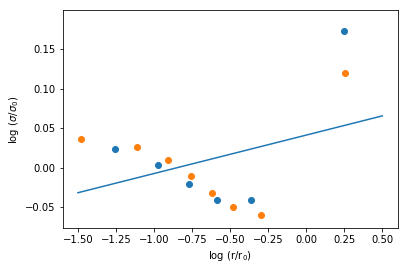

In [87]:
plt.scatter(np.log10(np.abs(r_list_04[np.where(eta_04>0)[0][0],:6]/5)), np.log10(sig_list_04[np.where(eta_04>0)[0][0],:6]/sig_0_04[np.where(eta_04>0)[0][0]]))
plt.scatter(np.log10(np.abs(r_list_04[np.where(eta_04>0)[0][0],7:]/5)), np.log10(sig_list_04[np.where(eta_04>0)[0][0],7:]/sig_0_04[np.where(eta_04>0)[0][0]]))

r_slit = r_list_04[np.where(eta_04>0)[0][0]]/5
sig_slit = sig_list_04[np.where(eta_04>0)[0][0]]/sig_0_04[np.where(eta_04>0)[0][0]]

sig_fit = np.polyfit(np.log10(np.abs(r_slit[np.argsort(np.abs(r_slit))[1:]])), np.log10(sig_slit[np.argsort(np.abs(r_slit))[1:]]), 1)
myf = np.poly1d(sig_fit)
plt.plot([-1.5,0.5],myf([-1.5,0.5]))

plt.xlabel("log (r/r$_{0}$)")
plt.ylabel("log ($\sigma$/$\sigma_{0}$)")

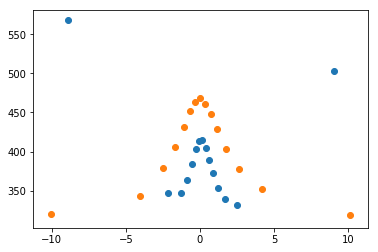

In [90]:
plt.scatter(r_list_04[np.where(eta_04>0)[0][0]],sig_list_04[np.where(eta_04>0)[0][0]])

plt.scatter(r_list[50],sig_list[50])

In [ ]:
for i in range(0,len(long_slit_data)):
    plt.plot(r_slit_list_0[i],sig_slit_list_0[i])

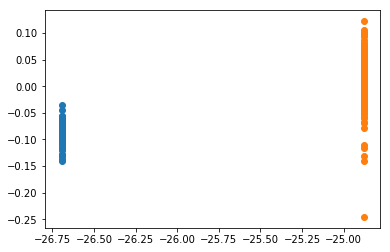

In [17]:
plt.scatter(Mk,eta)
plt.scatter(Mk_04,eta_04)

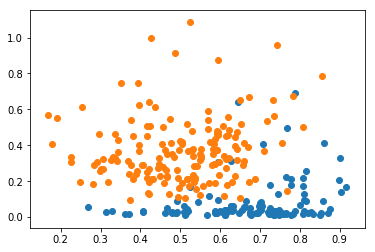

In [18]:
plt.scatter(ellip,v_max/sig_0)
plt.scatter(ellip_04,v_max_04/sig_0_04)